# Cricket_Analytics


*   19IT137 - Adityasinh Solanki
*   19IT147 - Darshan vanol



## Dataset: IPL Ball-by-Ball 2008-2020
From this database, an aggregate data about the performance statistics for both batting and bowling roles for the whole tournament is extracted and stored. From this aggregated values different performance measures are evaluated about the batsmen, bowlers, and overall tournament averages. 

In [ ]:
# Importing basic libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Reading files
byb=pd.read_csv('/content/drive/MyDrive/IPL DATASET/IPL Ball-by-Ball 2008-2020.csv')
match= pd.read_csv('/content/drive/MyDrive/IPL DATASET/IPL Matches 2008-2020.csv')
byb.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [ ]:
byb.shape

(193468, 18)

In [ ]:
byb.columns

Index(['id', 'inning', 'over', 'ball', 'batsman', 'non_striker', 'bowler',
       'batsman_runs', 'extra_runs', 'total_runs', 'non_boundary', 'is_wicket',
       'dismissal_kind', 'player_dismissed', 'fielder', 'extras_type',
       'batting_team', 'bowling_team'],
      dtype='object')

In [ ]:
byb.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [ ]:
rcb= ['AB de Villiers', 'V Kohli', 'GJ Maxwell', 'D Padikkal', 'Shahbaz Ahmed',
      'DT Christian', 'HV Patel', 'Mohammed Siraj', 'YS Chahal', 'N Saini'  ]

mi = ['Q de Kock', 'Ishan Kishan','RG Sharma','SA Yadav', 'KA Pollard',
      'CA Lynn', 'A Singh','SS Tiwary',  'KH Pandya', 'HH Pandya',
      'JDS Neesham', 'JJ Bumrah',  'TA Boult', 'RD Chahar',  'AF Milne',
      'J Yadav', 'NM Coulter-Nile' ]

### Batting measures and ranking index for batsman
To rank the batsman, we have collected the information about particular batsman like total runs scored by the batsman, number of innings played, number of times the batsman is out, number of balls faced, total number of 4’s and 6’s hit by the batsman, number of 100’s and 50’s and highest score of the batsman in the whole tournament. This data is further used to compute the features which aid in quantifying the players.
### Batsman Statistics
* Runs scored
* Innings played
* Number of times batsman not out
* 100's
* 50's
* Balls faced
* Number of times batsman got out
* Number of balls faced by the batsman
* total number of 4's and 6's
* highest score



In [ ]:
batsman_stats =pd.DataFrame(
    columns=["name","inn_played","run_scored","bowls_played","NOI","got_out","sixes","fours","centuries","half-centuries","highest_score","balls_bowled","wic_taken","BA","BS","MRA","OUTRATE","BRPI","bat_gen_avg","bat_gen_outrate","bat_gen_sr","AGR","RI"])

In [ ]:
name=[]
rs=[]
bf=[]
bb=[]
wt=[]
inn=[]
noi=[]
sixes=[]
fours=[]
wic=[]
cen=[]
half_cen=[]
high_sc=[]
BA=[]
BS=[]
MRA=[]
OUTRATE=[]
BRPI=[]

In [ ]:
team1=mi
team2=rcb
for i in team1:
  batsman_data = byb[(byb["batsman"]==i)]
  bowl_by_bat=  byb[(byb["bowler"]==i)]
  name.append(i)
  rs.append(sum(batsman_data.batsman_runs))
  bf.append(len(batsman_data.batsman_runs))
  bb.append(len(bowl_by_bat))
  wt.append(sum(bowl_by_bat.is_wicket))
  
  sixes.append(len(batsman_data[batsman_data['batsman_runs']==6]['batsman_runs']))
  fours.append(len(batsman_data[batsman_data['batsman_runs']==4]['batsman_runs']))
  wic.append(sum(batsman_data.is_wicket))

  unq_id=batsman_data['id'].unique()
  matched_played=len(unq_id)
  inn.append(matched_played)
  noi.append(matched_played-sum(batsman_data.is_wicket))

  bbr = []

  for x in unq_id:
            bat_run = sum(byb[(byb["batsman"]==i)&(byb['id']==x)]['batsman_runs'])
            bbr.append(bat_run)

  r50,r100 =0,0
  for m in bbr:
            if m>=100:
                r100+=1
            elif m>=50:
                r50+=1
            else:
              continue
  half_cen.append(r50)
  cen.append(r100)
  high_sc.append(max(bbr))


  #print(name,"|",rs,"|",bf,"|",inn,"|",noi,"|",wic,"|",sixes,"|",fours,"|",cen,"|",half_cen,"|",high_sc)

In [ ]:
# importing colleced data to dataframe
batsman_stats['name']=name
batsman_stats['run_scored']=rs
batsman_stats['balls_bowled']=bb
batsman_stats['inn_played']=inn
batsman_stats['NOI']=noi
batsman_stats['got_out']=wic
batsman_stats['wic_taken']=wt
batsman_stats['sixes']=sixes
batsman_stats['fours']=fours
batsman_stats['centuries']=cen
batsman_stats['half-centuries']=half_cen
batsman_stats['highest_score']=high_sc
batsman_stats['bowls_played']=bf

In [ ]:
batsman_stats

,name,inn_played,run_scored,bowls_played,NOI,got_out,sixes,fours,centuries,half-centuries,...,BA,BS,MRA,OUTRATE,BRPI,bat_gen_avg,bat_gen_outrate,bat_gen_sr,AGR,RI
0,Q de Kock,66,1959,1499,6,60,76,201,1,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Ishan Kishan,46,1211,907,6,40,64,100,0,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,RG Sharma,194,5230,4088,17,177,214,458,1,39,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,SA Yadav,86,2024,1536,21,65,58,221,0,11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,KA Pollard,144,3023,2107,38,106,198,196,0,15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,CA Lynn,41,1280,938,4,37,63,128,0,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,A Singh,5,2,10,1,4,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,SS Tiwary,69,1379,1192,21,48,48,101,0,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,KH Pandya,57,1000,727,19,38,40,95,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,HH Pandya,74,1349,897,27,47,93,86,0,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



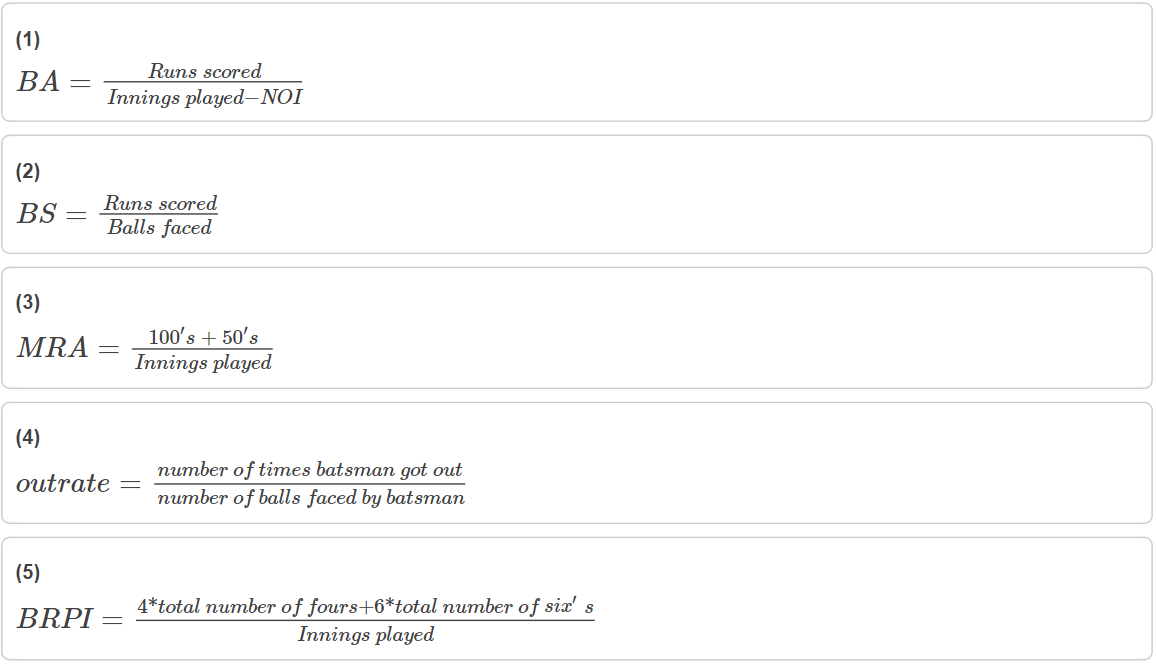

* The Batting Average (BA) - gives the average runs scored by the batsman in the tournament 

* The Batting strike rate (BS) - provides the information about an average number of runs scored per 100 balls faced by the batsman. 

* Milestone reaching ability (MRA) - the total number of 100’s and 50’s made by the batsman, which contributes to the total score of the team.

* Boundary runs per innings (BRPI) - total number of four’s and six’s hit by the batsman in the tournament.

In [ ]:
batsman_stats['BA']=batsman_stats['run_scored']/batsman_stats['got_out']
batsman_stats['BS']=(batsman_stats['run_scored']/batsman_stats['bowls_played'])*100
batsman_stats['MRA']=(batsman_stats['centuries']+batsman_stats['half-centuries'])/batsman_stats['inn_played']
batsman_stats['OUTRATE']=batsman_stats['got_out']/batsman_stats['bowls_played']
batsman_stats['BRPI']=(4*batsman_stats['fours']+6*batsman_stats['sixes'])/batsman_stats['inn_played']


In [ ]:
batsman_stats 

,name,inn_played,run_scored,bowls_played,NOI,got_out,sixes,fours,centuries,half-centuries,...,BA,BS,MRA,OUTRATE,BRPI,bat_gen_avg,bat_gen_outrate,bat_gen_sr,AGR,RI
0,Q de Kock,66,1959,1499,6,60,76,201,1,14,...,32.650000,130.687125,0.227273,0.040027,19.090909,NaN,NaN,NaN,NaN,NaN
1,Ishan Kishan,46,1211,907,6,40,64,100,0,7,...,30.275000,133.517089,0.152174,0.044101,17.043478,NaN,NaN,NaN,NaN,NaN
2,RG Sharma,194,5230,4088,17,177,214,458,1,39,...,29.548023,127.935421,0.206186,0.043297,16.061856,NaN,NaN,NaN,NaN,NaN
3,SA Yadav,86,2024,1536,21,65,58,221,0,11,...,31.138462,131.770833,0.127907,0.042318,14.325581,NaN,NaN,NaN,NaN,NaN
4,KA Pollard,144,3023,2107,38,106,198,196,0,15,...,28.518868,143.474134,0.104167,0.050308,13.694444,NaN,NaN,NaN,NaN,NaN
5,CA Lynn,41,1280,938,4,37,63,128,0,10,...,34.594595,136.460554,0.243902,0.039446,21.707317,NaN,NaN,NaN,NaN,NaN
6,A Singh,5,2,10,1,4,0,0,0,0,...,0.500000,20.000000,0.000000,0.400000,0.000000,NaN,NaN,NaN,NaN,NaN
7,SS Tiwary,69,1379,1192,21,48,48,101,0,7,...,28.729167,115.687919,0.101449,0.040268,10.028986,NaN,NaN,NaN,NaN,NaN
8,KH Pandya,57,1000,727,19,38,40,95,0,1,...,26.315789,137.551582,0.017544,0.052270,10.877193,NaN,NaN,NaN,NaN,NaN
9,HH Pandya,74,1349,897,27,47,93,86,0,4,...,28.702128,150.390190,0.054054,0.052397,12.189189,NaN,NaN,NaN,NaN,NaN


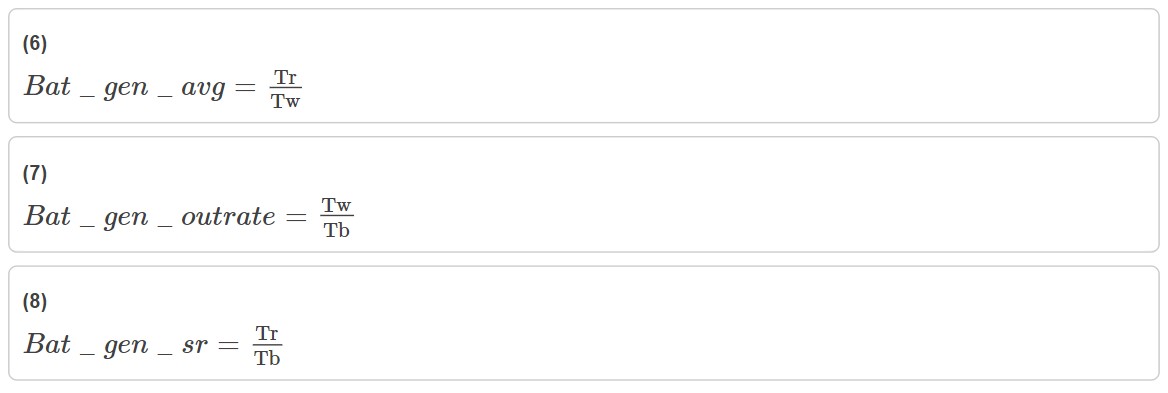

As we are quantifying the players and rank them in the order for particular series, We have devised a method in which the overall performance of the tournament is considered. Three measures:
* general batting average (Bat_gen_avg), 
* general batting out rate (Bat_gen_outrate) 
* batting general strike rate (Bat_gen_sr) 

These mesures calculated by using the aggregated measures of the tournament like total number of runs scored (Tr), total number of wickets taken (TW) and total number of balls bowled (Tb)in the entire tournament. These measures are given by the following equations.

In [ ]:
batsman_stats['bat_gen_avg']=batsman_stats['run_scored']/batsman_stats['wic_taken']
batsman_stats['bat_gen_outrate']=batsman_stats['wic_taken']/batsman_stats['balls_bowled']
batsman_stats['bat_gen_sr']=batsman_stats['run_scored']/batsman_stats['balls_bowled']

In [ ]:
batsman_stats['bat_gen_outrate']=batsman_stats['bat_gen_outrate'].fillna(0)

In [ ]:
batsman_stats

,name,inn_played,run_scored,bowls_played,NOI,got_out,sixes,fours,centuries,half-centuries,...,BA,BS,MRA,OUTRATE,BRPI,bat_gen_avg,bat_gen_outrate,bat_gen_sr,AGR,RI
0,Q de Kock,66,1959,1499,6,60,76,201,1,14,...,32.650000,130.687125,0.227273,0.040027,19.090909,inf,0.000000,inf,NaN,NaN
1,Ishan Kishan,46,1211,907,6,40,64,100,0,7,...,30.275000,133.517089,0.152174,0.044101,17.043478,inf,0.000000,inf,NaN,NaN
2,RG Sharma,194,5230,4088,17,177,214,458,1,39,...,29.548023,127.935421,0.206186,0.043297,16.061856,326.875000,0.046784,15.292398,NaN,NaN
3,SA Yadav,86,2024,1536,21,65,58,221,0,11,...,31.138462,131.770833,0.127907,0.042318,14.325581,inf,0.000000,337.333333,NaN,NaN
4,KA Pollard,144,3023,2107,38,106,198,196,0,15,...,28.518868,143.474134,0.104167,0.050308,13.694444,42.577465,0.050212,2.137907,NaN,NaN
5,CA Lynn,41,1280,938,4,37,63,128,0,10,...,34.594595,136.460554,0.243902,0.039446,21.707317,inf,0.000000,inf,NaN,NaN
6,A Singh,5,2,10,1,4,0,0,0,0,...,0.500000,20.000000,0.000000,0.400000,0.000000,0.064516,0.063786,0.004115,NaN,NaN
7,SS Tiwary,69,1379,1192,21,48,48,101,0,7,...,28.729167,115.687919,0.101449,0.040268,10.028986,inf,0.000000,inf,NaN,NaN
8,KH Pandya,57,1000,727,19,38,40,95,0,1,...,26.315789,137.551582,0.017544,0.052270,10.877193,20.408163,0.038192,0.779423,NaN,NaN
9,HH Pandya,74,1349,897,27,47,93,86,0,4,...,28.702128,150.390190,0.054054,0.052397,12.189189,29.977778,0.049234,1.475930,NaN,NaN


Using the generic performance of the overall tournament and the player specific information in the tournament, we find the AGR (above generic average runs) for each player

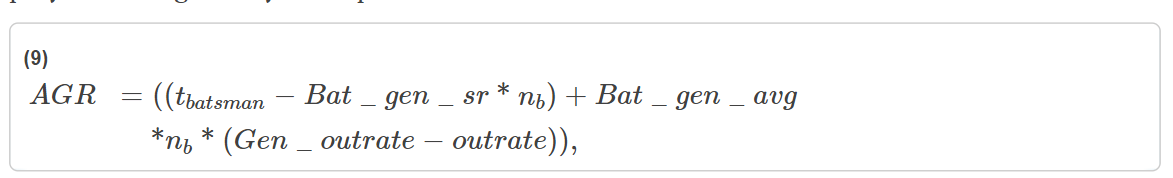

In [ ]:
batsman_stats['AGR']=(batsman_stats['run_scored']-batsman_stats['bat_gen_sr']*batsman_stats['bowls_played'])+batsman_stats['bat_gen_avg']*batsman_stats['bowls_played']*(batsman_stats['bat_gen_outrate']-batsman_stats['OUTRATE'])

In [ ]:
batsman_stats

,name,inn_played,run_scored,bowls_played,NOI,got_out,sixes,fours,centuries,half-centuries,...,BA,BS,MRA,OUTRATE,BRPI,bat_gen_avg,bat_gen_outrate,bat_gen_sr,AGR,RI
0,Q de Kock,66,1959,1499,6,60,76,201,1,14,...,32.650000,130.687125,0.227273,0.040027,19.090909,inf,0.000000,inf,-inf,NaN
1,Ishan Kishan,46,1211,907,6,40,64,100,0,7,...,30.275000,133.517089,0.152174,0.044101,17.043478,inf,0.000000,inf,-inf,NaN
2,RG Sharma,194,5230,4088,17,177,214,458,1,39,...,29.548023,127.935421,0.206186,0.043297,16.061856,326.875000,0.046784,15.292398,-5.262687e+04,NaN
3,SA Yadav,86,2024,1536,21,65,58,221,0,11,...,31.138462,131.770833,0.127907,0.042318,14.325581,inf,0.000000,337.333333,-inf,NaN
4,KA Pollard,144,3023,2107,38,106,198,196,0,15,...,28.518868,143.474134,0.104167,0.050308,13.694444,42.577465,0.050212,2.137907,-1.490211e+03,NaN
5,CA Lynn,41,1280,938,4,37,63,128,0,10,...,34.594595,136.460554,0.243902,0.039446,21.707317,inf,0.000000,inf,-inf,NaN
6,A Singh,5,2,10,1,4,0,0,0,0,...,0.500000,20.000000,0.000000,0.400000,0.000000,0.064516,0.063786,0.004115,1.741935e+00,NaN
7,SS Tiwary,69,1379,1192,21,48,48,101,0,7,...,28.729167,115.687919,0.101449,0.040268,10.028986,inf,0.000000,inf,-inf,NaN
8,KH Pandya,57,1000,727,19,38,40,95,0,1,...,26.315789,137.551582,0.017544,0.052270,10.877193,20.408163,0.038192,0.779423,2.244898e+02,NaN
9,HH Pandya,74,1349,897,27,47,93,86,0,4,...,28.702128,150.390190,0.054054,0.052397,12.189189,29.977778,0.049234,1.475930,-5.995556e+01,NaN


Using the generic performance of the overall tournament and the player specific information in the tournament, we find the AGR (above generic average runs) for each player

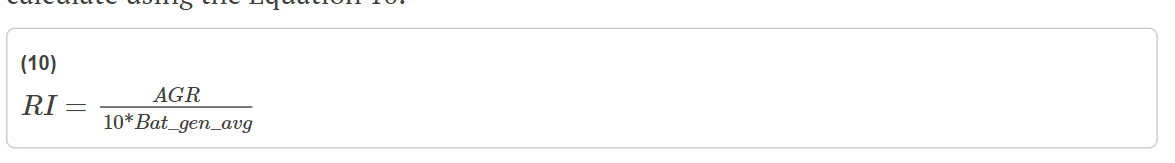

In [ ]:
batsman_stats['RI']=batsman_stats['AGR']/(batsman_stats['bat_gen_avg']*10)

In [ ]:
batsman_stats['RI']=batsman_stats['RI'].fillna(0)

In [ ]:
batsman_stats

,name,inn_played,run_scored,bowls_played,NOI,got_out,sixes,fours,centuries,half-centuries,...,BA,BS,MRA,OUTRATE,BRPI,bat_gen_avg,bat_gen_outrate,bat_gen_sr,AGR,RI
0,Q de Kock,66,1959,1499,6,60,76,201,1,14,...,32.650000,130.687125,0.227273,0.040027,19.090909,inf,0.000000,inf,-inf,0.0
1,Ishan Kishan,46,1211,907,6,40,64,100,0,7,...,30.275000,133.517089,0.152174,0.044101,17.043478,inf,0.000000,inf,-inf,0.0
2,RG Sharma,194,5230,4088,17,177,214,458,1,39,...,29.548023,127.935421,0.206186,0.043297,16.061856,326.875000,0.046784,15.292398,-5.262687e+04,-16.1
3,SA Yadav,86,2024,1536,21,65,58,221,0,11,...,31.138462,131.770833,0.127907,0.042318,14.325581,inf,0.000000,337.333333,-inf,0.0
4,KA Pollard,144,3023,2107,38,106,198,196,0,15,...,28.518868,143.474134,0.104167,0.050308,13.694444,42.577465,0.050212,2.137907,-1.490211e+03,-3.5
5,CA Lynn,41,1280,938,4,37,63,128,0,10,...,34.594595,136.460554,0.243902,0.039446,21.707317,inf,0.000000,inf,-inf,0.0
6,A Singh,5,2,10,1,4,0,0,0,0,...,0.500000,20.000000,0.000000,0.400000,0.000000,0.064516,0.063786,0.004115,1.741935e+00,2.7
7,SS Tiwary,69,1379,1192,21,48,48,101,0,7,...,28.729167,115.687919,0.101449,0.040268,10.028986,inf,0.000000,inf,-inf,0.0
8,KH Pandya,57,1000,727,19,38,40,95,0,1,...,26.315789,137.551582,0.017544,0.052270,10.877193,20.408163,0.038192,0.779423,2.244898e+02,1.1
9,HH Pandya,74,1349,897,27,47,93,86,0,4,...,28.702128,150.390190,0.054054,0.052397,12.189189,29.977778,0.049234,1.475930,-5.995556e+01,-0.2


# BOWLER STATISTICS

* run conceded
* wicket taken
* ball bowled
* run conceded
* over bowled

In [ ]:
bowler_stats =pd.DataFrame(
    columns=["name","inn_played","run_conceded","balls_bowled","over_bowled","wic_taken","BA","BS","BE","OUTRATE","bowl_gen_avg","bowl_gen_outrate","bowl_gen_sr","AGR","RI"])

In [ ]:
bowler_name=[]
rc=[]
bb=[]
ob=[]
bowler_inn=[]
wt=[]
Bowl_Ang=[]
Bowl_Sr=[]
Bowl_Eco=[]
Bowl_OUTRATE=[]

In [ ]:
from numpy.ma.core import ceil
team1=mi
team2=rcb
for i in team1:
  bowler_data = byb[(byb["bowler"]==i)]
  bowler_name.append(i)
  rc.append(sum(bowler_data.batsman_runs))
  bb.append(len(bowler_data))
  ob.append(ceil(len(bowler_data)/6))
  wt.append(sum(bowler_data.is_wicket))
  
  unq_id=bowler_data['id'].unique()
  matched_played=len(unq_id)
  bowler_inn.append(matched_played)

In [ ]:
#Insert bowlers measures into dataframe
bowler_stats['name']=bowler_name
bowler_stats['run_conceded']=rc
bowler_stats['inn_played']=bowler_inn
bowler_stats['balls_bowled']=bb
bowler_stats['over_bowled']=ob
bowler_stats['wic_taken']=wt


In [ ]:
#bowler_stats.drop((bowler_data['balls_bowled']=0))
#bowler_stats.drop(bowler_stats[bowler_stats['balls_bowled']!=0]['name'])

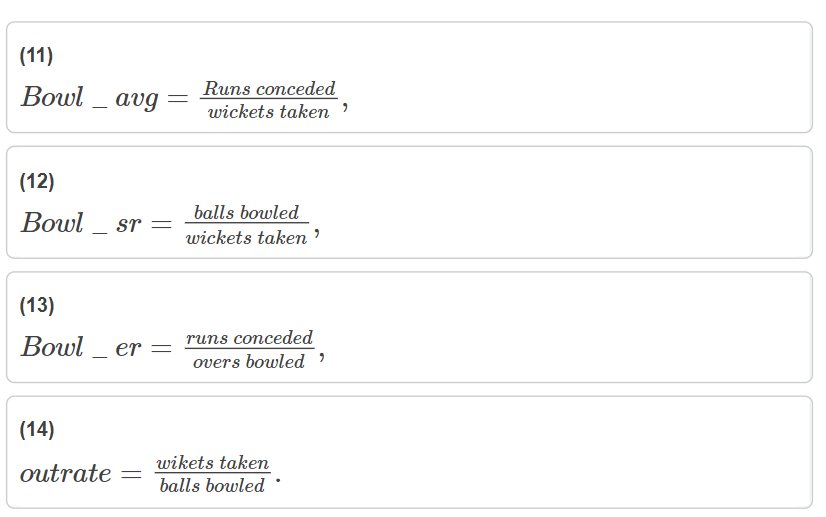

In [ ]:
bowler_stats['BA']=bowler_stats['run_conceded']/bowler_stats['wic_taken']
bowler_stats['BS']=bowler_stats['balls_bowled']/bowler_stats['wic_taken']
bowler_stats['BE']=bowler_stats['run_conceded']/bowler_stats['over_bowled']
bowler_stats['OUTRATE']=bowler_stats['wic_taken']/bowler_stats['balls_bowled']

In [ ]:
#bowler_stats.drop(3)
bowler_stats.drop(bowler_stats[bowler_stats['inn_played']==0].index.values)

,name,inn_played,run_conceded,balls_bowled,over_bowled,wic_taken,BA,BS,BE,OUTRATE,bowl_gen_avg,bowl_gen_outrate,bowl_gen_sr,AGR,RI
2,RG Sharma,30,425,342,57.0,16,26.562500,21.375000,7.456140,0.046784,NaN,NaN,NaN,NaN,NaN
3,SA Yadav,1,8,6,1.0,0,inf,inf,8.000000,0.000000,NaN,NaN,NaN,NaN,NaN
4,KA Pollard,92,1866,1414,236.0,71,26.281690,19.915493,7.906780,0.050212,NaN,NaN,NaN,NaN,NaN
6,A Singh,23,603,486,81.0,31,19.451613,15.677419,7.444444,0.063786,NaN,NaN,NaN,NaN,NaN
8,KH Pandya,69,1460,1283,214.0,49,29.795918,26.183673,6.822430,0.038192,NaN,NaN,NaN,NaN,NaN
9,HH Pandya,60,1268,914,153.0,45,28.177778,20.311111,8.287582,0.049234,NaN,NaN,NaN,NaN,NaN
10,JDS Neesham,9,233,150,25.0,3,77.666667,50.000000,9.320000,0.020000,NaN,NaN,NaN,NaN,NaN
11,JJ Bumrah,92,2513,2159,360.0,119,21.117647,18.142857,6.980556,0.055118,NaN,NaN,NaN,NaN,NaN
12,TA Boult,48,1531,1152,192.0,67,22.850746,17.194030,7.973958,0.058160,NaN,NaN,NaN,NaN,NaN
13,RD Chahar,30,785,656,110.0,31,25.322581,21.161290,7.136364,0.047256,NaN,NaN,NaN,NaN,NaN


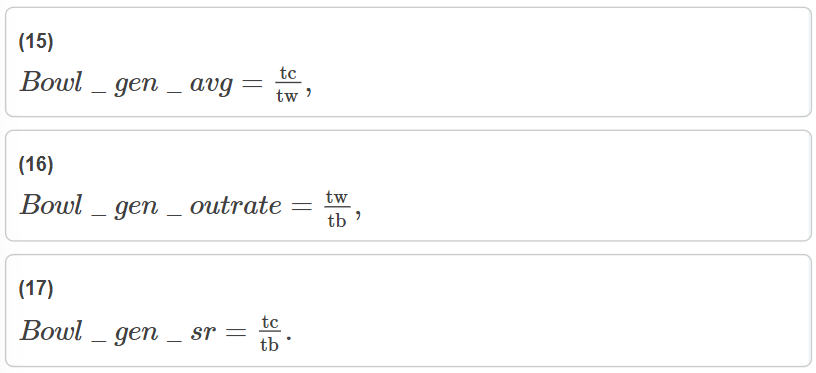

In [ ]:
bowler_stats['bowl_gen_avg']=bowler_stats['run_conceded']/bowler_stats['wic_taken']
bowler_stats['bowl_gen_outrate']=bowler_stats['wic_taken']/bowler_stats['balls_bowled']
bowler_stats['bowl_gen_sr']=bowler_stats['run_conceded']/bowler_stats['balls_bowled']

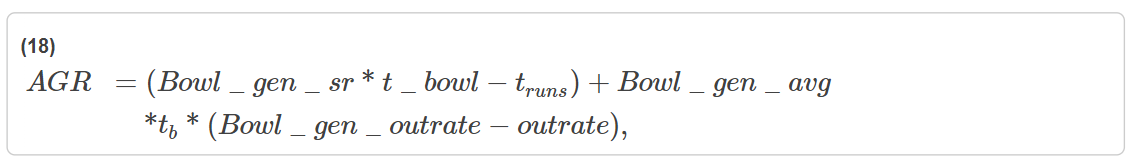

In [ ]:
bowler_stats['AGR']=((bowler_stats['bowl_gen_sr']*bowler_stats['balls_bowled'])-bowler_stats['run_conceded'])+bowler_stats['bowl_gen_avg']*bowler_stats['balls_bowled']*(bowler_stats['bowl_gen_outrate']-bowler_stats['OUTRATE'])

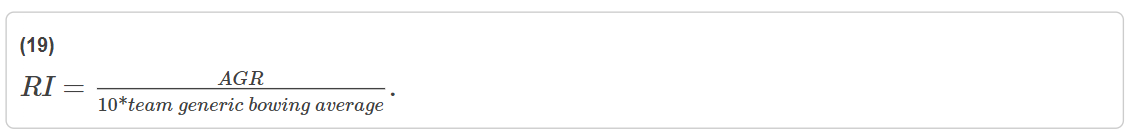

In [ ]:
bowler_stats['RI']=bowler_stats['AGR']/10*bowler_stats['bowl_gen_avg']

In [ ]:
bowler_stats

,name,inn_played,run_conceded,balls_bowled,over_bowled,wic_taken,BA,BS,BE,OUTRATE,bowl_gen_avg,bowl_gen_outrate,bowl_gen_sr,AGR,RI
0,Q de Kock,0,0,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Ishan Kishan,0,0,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,RG Sharma,30,425,342,57.0,16,26.562500,21.375000,7.456140,0.046784,26.562500,0.046784,1.242690,0.000000e+00,0.000000e+00
3,SA Yadav,1,8,6,1.0,0,inf,inf,8.000000,0.000000,inf,0.000000,1.333333,NaN,NaN
4,KA Pollard,92,1866,1414,236.0,71,26.281690,19.915493,7.906780,0.050212,26.281690,0.050212,1.319661,0.000000e+00,0.000000e+00
5,CA Lynn,0,0,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,A Singh,23,603,486,81.0,31,19.451613,15.677419,7.444444,0.063786,19.451613,0.063786,1.240741,0.000000e+00,0.000000e+00
7,SS Tiwary,0,0,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,KH Pandya,69,1460,1283,214.0,49,29.795918,26.183673,6.822430,0.038192,29.795918,0.038192,1.137958,0.000000e+00,0.000000e+00
9,HH Pandya,60,1268,914,153.0,45,28.177778,20.311111,8.287582,0.049234,28.177778,0.049234,1.387309,0.000000e+00,0.000000e+00
